> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: TMDB Movies 
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [1]:
#Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
#Reading the dataset
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [4]:
df.shape

(10866, 21)

In [5]:
#Checking for NA lines
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning 


In [7]:
#Dropping columns that wont be usefull for us 
df.drop(['imdb_id','original_title','cast',  'homepage','tagline',
         'keywords', 'overview'],axis = 1, inplace = True)

In [8]:
df.head()

,id,popularity,budget,revenue,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
id                      10866 non-null int64
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


In [10]:
df.vote_average.mean()

5.9749217743419845

In [11]:
#Dropping na Rows with Not_Registered
df["production_companies"].fillna("Not_Registered",inplace = True)

In [12]:
df["production_companies"].tail(25)

10841                                        Proteus Films
10842                                       Not_Registered
10843                    Julian Blaustein Productions Ltd.
10844                                     20th Century Fox
10845                             Peter Rogers Productions
10846       Seven Arts Productions|Hammer Film Productions
10847                     Planet Film Productions|Protelco
10848               Twentieth Century Fox Film Corporation
10849                                   Universal Pictures
10850                                         Warner Bros.
10851                                            High Road
10852                                Eden Productions Inc.
10853                                       Not_Registered
10854       Horizon Pictures|Columbia Pictures Corporation
10855                                   Universal Pictures
10856                                 Walt Disney Pictures
10857    Paramount Pictures|Solar Productions|Embassy P.

In [13]:
#Checking for duplicates
sum(df.duplicated())

1

In [14]:
#Dropping duplicate rows
df.drop_duplicates(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    10865 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


In [15]:
#Replacing Genres text with dummies to be easier to work on when needed
dummy = df['genres'].str.get_dummies(sep='|')
df = pd.concat([df, dummy], axis=1)

In [16]:
df.drop(['genres'],axis = 1, inplace = True)

In [17]:
dummies = df["production_companies"].str.get_dummies(sep='|')
df1 = pd.concat([df, dummies], axis=1)

In [18]:
df1

,id,popularity,budget,revenue,director,runtime,production_companies,release_date,vote_count,vote_average,...,platinum studios,teamWorx Produktion fÃ¼r Kino und Fernsehen GmbH,the filmgroup,thefyzz,thinkfilm,uFilm,uFund,verture Films,Ã–sterreichischer Rundfunk (ORF),í”„ë¡œë•ì…˜M
0,135397,32.985763,150000000,1513528810,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,...,0,0,0,0,0,0,0,0,0,0
1,76341,28.419936,150000000,378436354,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,...,0,0,0,0,0,0,0,0,0,0
2,262500,13.112507,110000000,295238201,Robert Schwentke,119,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,...,0,0,0,0,0,0,0,0,0,0
3,140607,11.173104,200000000,2068178225,J.J. Abrams,136,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,...,0,0,0,0,0,0,0,0,0,0
4,168259,9.335014,190000000,1506249360,James Wan,137,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,...,0,0,0,0,0,0,0,0,0,0
5,281957,9.110700,135000000,532950503,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,...,0,0,0,0,0,0,0,0,0,0
6,87101,8.654359,155000000,440603537,Alan Taylor,125,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,...,0,0,0,0,0,0,0,0,0,0
7,286217,7.667400,108000000,595380321,Ridley Scott,141,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,...,0,0,0,0,0,0,0,0,0,0
8,211672,7.404165,74000000,1156730962,Kyle Balda|Pierre Coffin,91,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,...,0,0,0,0,0,0,0,0,0,0
9,150540,6.326804,175000000,853708609,Pete Docter,94,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df1.shape

(10865, 7913)

In [20]:
#Using dummies to check the production company is not helpful as it 
#results in over 7000 columns which is not efficient for analysis 
#and not usefull for looking for corrolorations

In [21]:
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'director', 'runtime',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

In [22]:
#Adding a column that states whether or not the movie made revenue higher than its budget or not and
#if the revenue was equal to the budget 
df["Win"] = df['revenue'] >= df['budget']

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: Does putting more money in the movie budget guarantee that its income revenue to be higher than the budget? 

### A scatter plot was made between the Budget and Revenue to look at how both of them correlate.

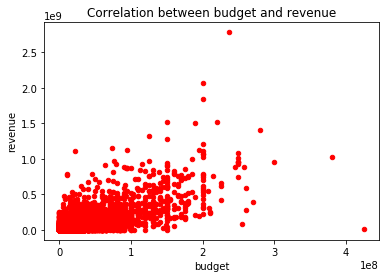

In [23]:
#Scatter plot Budget vs Revenue
df.plot(kind='scatter',x='budget',y="revenue",color='red',title ="Correlation between budget and revenue" );

### It can be seen in the previous graph that there are some cases were a huge budget has been made for the movie yet it didnot generate revenue equivelent to that budget. Thus, Increasing the budget doesnot insure a higher revenue

### The next bar chart was made to check whether the amount of money won was satisfing enough (equal or larger than the budget)

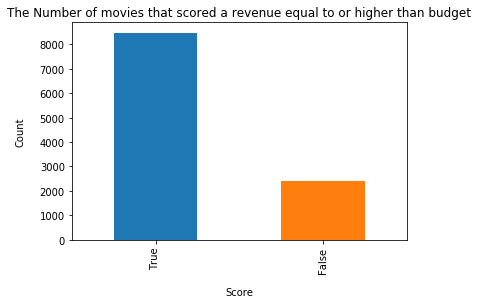

In [24]:
#Graph to show if the revenue was equal to or higher than the budget
df["Win"].value_counts().plot(kind='bar',x="vote_average",y="budget");
plt.xlabel("Score", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title("The Number of movies that scored a revenue equal to or higher than budget");

### It can be noticed from the graph that the number of movies that didnot generated revenue equal to or higher than the budget is fairly high

### Research Question 2 Does increasing the budget for a movie guarentee a better vote average and how can that be shown in the revenue value

### A scatter plot was made between the Vote average and Budget to look at how both of them correlate.

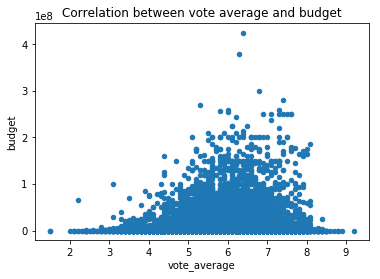

In [25]:
#Scatter plot of vote average vs budget
df.plot(kind='scatter',x="vote_average",y="budget",title ="Correlation between vote average and budget" );

### A scatter plot was made between the Vote average and Revenue to look at how both of them correlate.

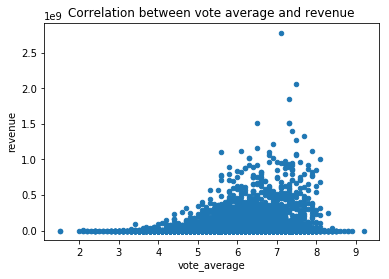

In [26]:
#Scatter plot of vote average vs revenue
df.plot(kind='scatter',x='vote_average',y="revenue",title ="Correlation between vote average and revenue" );

### As we can see that that that a higher budget does not insure a better vote average as it can be seen in the first graph. while the second graph signifies that a higher vote average doesnot insure higher revenue.

# Conclusions
### It is noticible that the budget doesnot mean that the revenue has to be huge.
### Also, a huge budget doesnot mean that the vote average to be huge.
### and from the previous graphs we can see that high vote average doesnot necessarily mean the movie generated huge revenue.
### A problem was faced with the dataset when trying to visualize correlation of production companies and their budget as there was about 7000 production companies for 10000 movies(i.e. There will be additional 7000 columns
### The existence of anomalies (outliers) was another problem which are needed to be excluded in the preprocessing step

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.